In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math

In [5]:
y = pd.read_csv("shopping-data.csv")

In [6]:
y.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


StopIteration: 

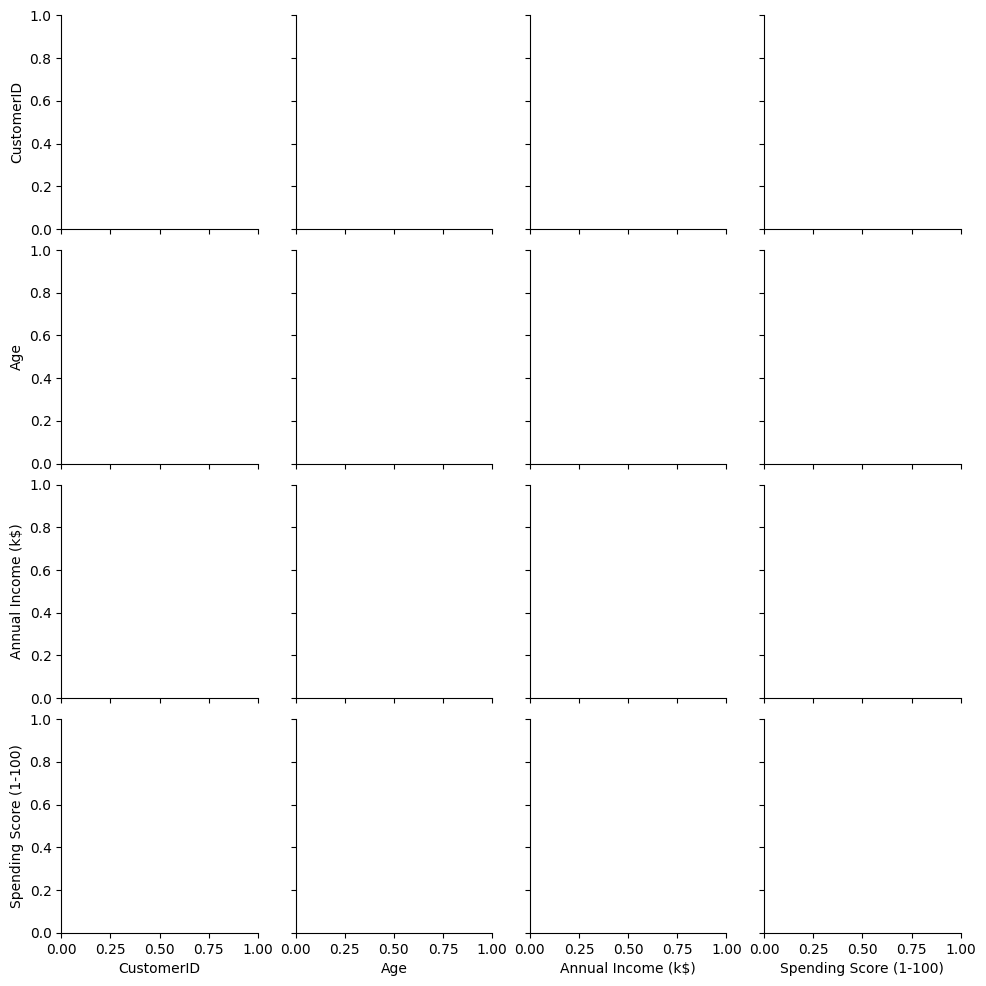

In [7]:
import seaborn as sns
plt.figure()
%matplotlib inline
sns.pairplot(pd.DataFrame(y))

In [13]:
y1=y.iloc[: , 3:5].values

# visualising the vectors of each catagory
x1 =y.iloc[: , 3].values
x2=y.iloc[: , 4].values
print(y1)
y1.shape

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

(200, 2)

Text(0, 0.5, 'y')

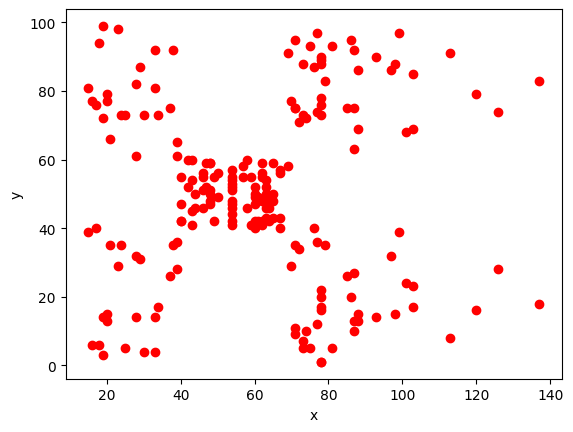

In [15]:
plt.scatter(x1,x2,c='red')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
clusters = sch.linkage(y1, 
            method='ward', 
            metric="euclidean")
print(clusters.shape)
print(clusters)
sch.dendrogram(Z=clusters)
plt.show()

NameError: name 'sch' is not defined

In [16]:
fig = plt.figure(figsize=(25, 10))

<Figure size 2500x1000 with 0 Axes>

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
k = AgglomerativeClustering(n_clusters =5).fit(y1)

In [21]:
labels = k.labels_
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


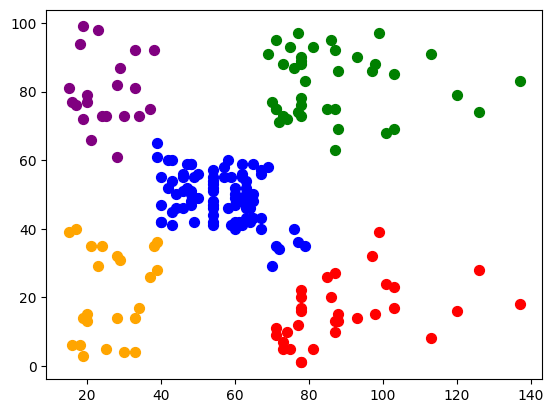

In [22]:
plt.scatter(y1[labels==0, 0], y1[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(y1[labels==1, 0], y1[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(y1[labels==2, 0], y1[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(y1[labels==3, 0], y1[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(y1[labels==4, 0], y1[labels==4, 1], s=50, marker='o', color='orange')
plt.show()